In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
print(diabetes_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
diabetes_df.head()
diabetes_df.drop_duplicates()
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
print(diabetes_df.isnull().sum())
print(diabetes_df.duplicated().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0


In [5]:
diabetes_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
53,8,176,90,34,300,33.7,0.467,58,1
369,1,133,102,28,140,32.8,0.234,45,1
443,8,108,70,0,0,30.5,0.955,33,1
177,0,129,110,46,130,67.1,0.319,26,1
469,6,154,78,41,140,46.1,0.571,27,0
756,7,137,90,41,0,32.0,0.391,39,0
627,0,132,78,0,0,32.4,0.393,21,0
156,2,99,52,15,94,24.6,0.637,21,0
292,2,128,78,37,182,43.3,1.224,31,1
260,3,191,68,15,130,30.9,0.299,34,0


In [6]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

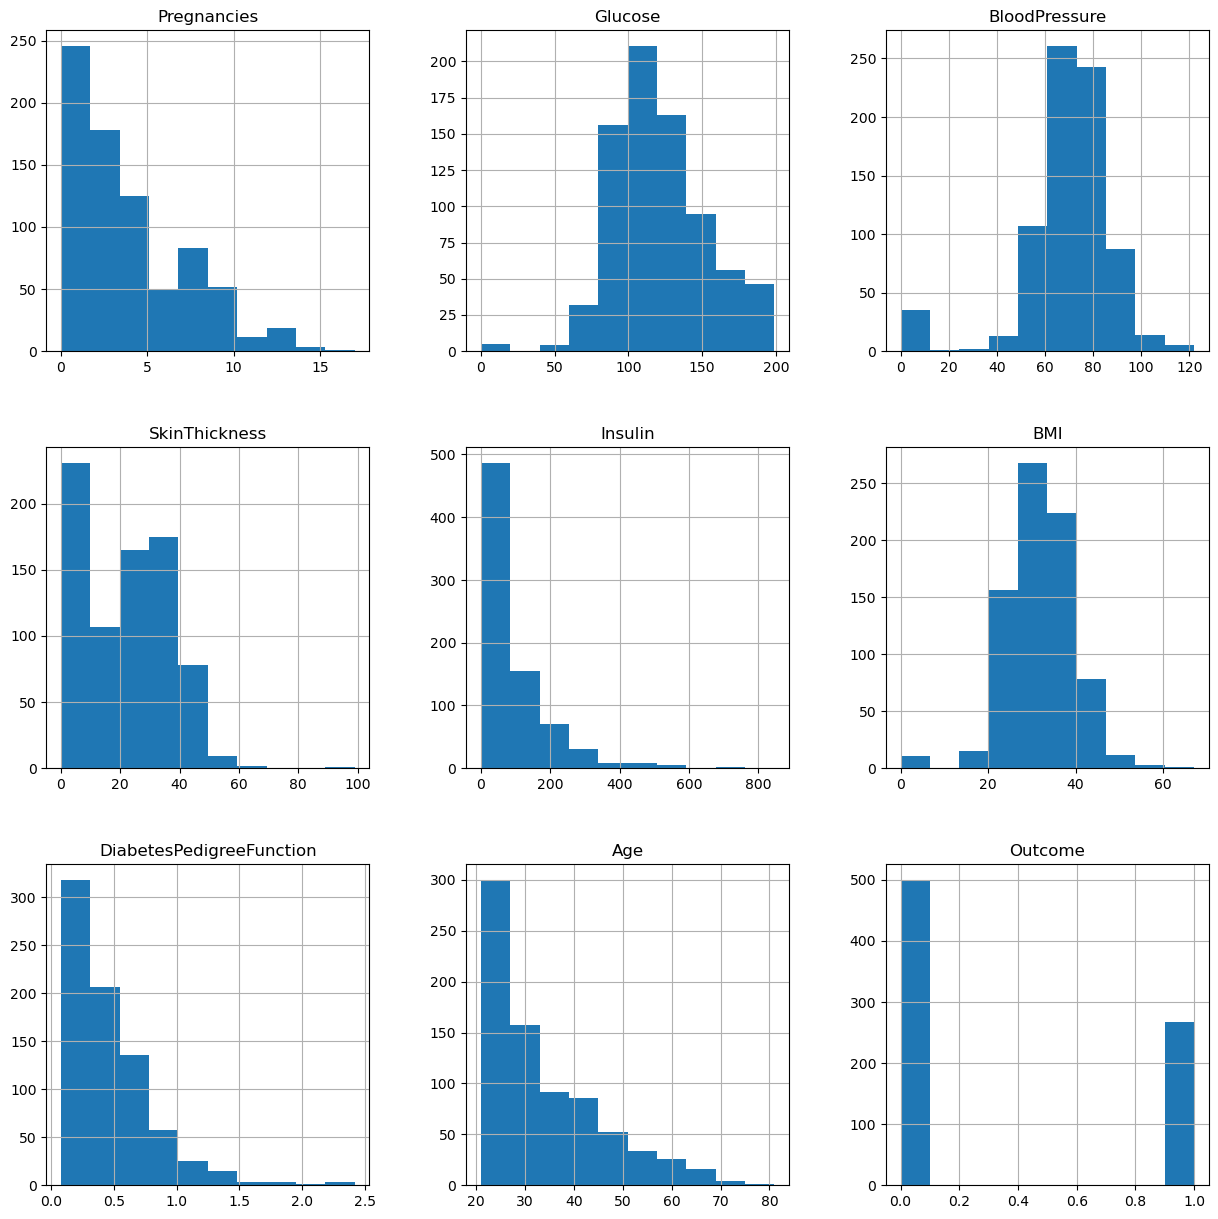

In [11]:
hist = diabetes_df.hist(figsize = (15,15))
diabetes_df.columns

In [12]:
#Define seed
np.random.seed(16)

In [13]:
import numpy as np
import keras
from keras.models import Sequential
#Define X and Y
X = diabetes_df.drop('Outcome', axis=1).values
Y = diabetes_df['Outcome'].values
#Train and Test X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#Multilayer Model
model = Sequential()
#First Layer
model.add(Dense(32, activation = 'relu', input_dim = 8))
#Second Layer
model.add(Dense(16, activation = 'relu'))
#Output Layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.3298 - loss: 26.2882
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.3881 - loss: 3.9035
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.6371 - loss: 1.7173
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.5620 - loss: 1.2147
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5931 - loss: 0.9625
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.6590 - loss: 0.8590
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.6029 - loss: 0.8050
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.6315 - loss: 0.7967
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.6435 - loss: 0.8236
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.6542 - loss: 0.8568
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6224 - loss: 0.7657
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
#Training Accuracy
scores = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
#Testing Accuracy
scores = model.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

Training Accuracy: 74.59%

Testing Accuracy: 75.97%



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


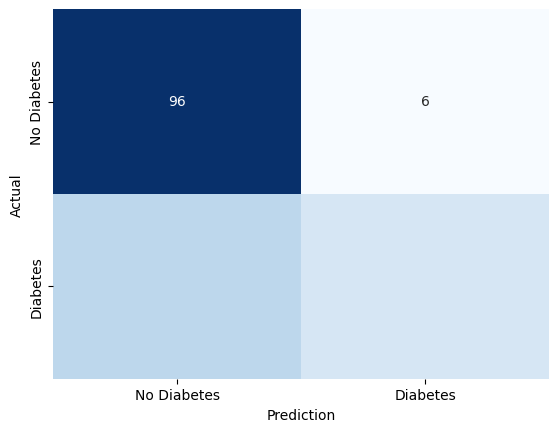

In [15]:
# Predicted probabilities for the test set
y_test_pred_probs = model.predict(X_test)
# Probabilities to class labels (0 or 1) using 0.5 as the threshold
y_test_pred = (y_test_pred_probs >= 0.5).astype(int)
# Create confusion matrix
c_matrix = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix using Seaborn
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
# Show the plot
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


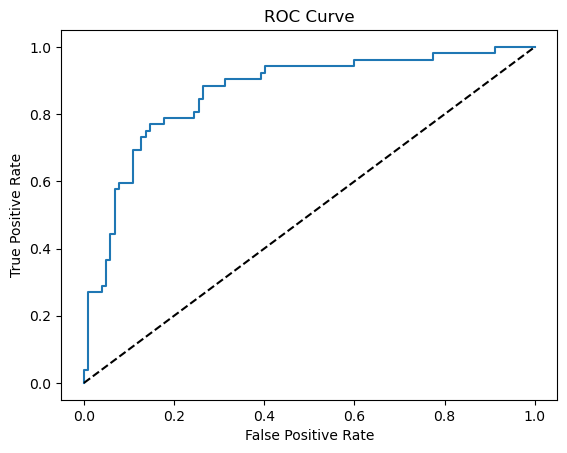

In [16]:
# Predicted probabilities for the test set
y_test_pred_probs = model.predict(X_test)
#Create roc_curve
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
#Title
plt.title('ROC Curve')
#Label
plt.xlabel('False Positive Rate')
#Ylabel
plt.ylabel('True Positive Rate')
# Show the plot
plt.show()